In [1]:
# Inverse Weighted Distance

In [1]:
from volumetricspy.stats import Dot,CloudPoints, IWD
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

In [2]:
x = [0,1,2,0,0,2]
y = [0,0,0,1,2,2]
v = [1,2,4,5,6,27]

dfp = pd.DataFrame({"x":x,"y":y,"v":v})

cp = CloudPoints().from_df(dfp, x='x',y='y',fields=['v'])
cp.df()

,x,y,z,crs,v
0,0.0,0.0,None,None,1.0
1,1.0,0.0,None,None,2.0
2,2.0,0.0,None,None,4.0
3,0.0,1.0,None,None,5.0
4,0.0,2.0,None,None,6.0
5,2.0,2.0,None,None,27.0


<AxesSubplot:xlabel='x', ylabel='y'>

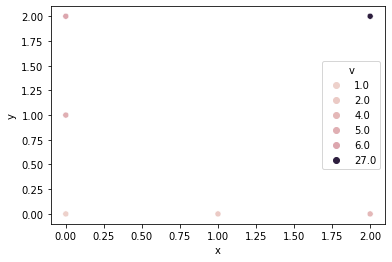

In [3]:
cp.plot(hue='v')

In [4]:
xu = [1,2,1,2,4,-1,8]
yu = [1,1,2,2,4,-1,8]
dfu = pd.DataFrame({"x":xu,"y":yu})
cpu = CloudPoints().from_df(dfu, x='x',y='y')
cpu.df()

,x,y,z,crs
0,1.0,1.0,None,None
1,2.0,1.0,None,None
2,1.0,2.0,None,None
3,2.0,2.0,None,None
4,4.0,4.0,None,None
5,-1.0,-1.0,None,None
6,8.0,8.0,None,None


<AxesSubplot:xlabel='x', ylabel='y'>

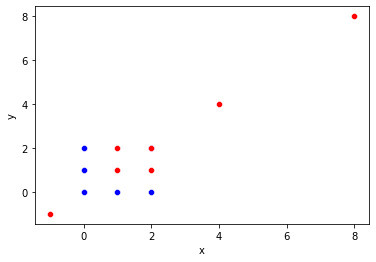

In [8]:
fig, ax = plt.subplots()

cp.plot(ax=ax, color='blue')
cpu.plot(ax=ax,color='red')

In [9]:
iwd = IWD(
    known_cp = cp,
    unknown_cp = cpu,
    p = 2
)

iwd


IWD(known_cp=CloudPoints(points=[Dot(x=0.0, y=0.0, z=None, crs=None, fields={'v': 1.0}), Dot(x=1.0, y=0.0, z=None, crs=None, fields={'v': 2.0}), Dot(x=2.0, y=0.0, z=None, crs=None, fields={'v': 4.0}), Dot(x=0.0, y=1.0, z=None, crs=None, fields={'v': 5.0}), Dot(x=0.0, y=2.0, z=None, crs=None, fields={'v': 6.0}), Dot(x=2.0, y=2.0, z=None, crs=None, fields={'v': 27.0})]), unknown_cp=CloudPoints(points=[Dot(x=1.0, y=1.0, z=None, crs=None, fields=None), Dot(x=2.0, y=1.0, z=None, crs=None, fields=None), Dot(x=1.0, y=2.0, z=None, crs=None, fields=None), Dot(x=2.0, y=2.0, z=None, crs=None, fields=None), Dot(x=4.0, y=4.0, z=None, crs=None, fields=None), Dot(x=-1.0, y=-1.0, z=None, crs=None, fields=None), Dot(x=8.0, y=8.0, z=None, crs=None, fields=None)]), p=2.0, max_distance=None)

In [10]:
wm = iwd.forward('v')
wm.df()

/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/krigging.py:33: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distance = 1 / np.power(kudm,p)


,x,y,z,crs,v
0,1.0,1.0,None,None,6.500000
1,2.0,1.0,None,None,11.000000
2,1.0,2.0,None,None,11.746032
3,2.0,2.0,None,None,3.926829
4,4.0,4.0,None,None,12.449814
5,-1.0,-1.0,None,None,3.807692
6,8.0,8.0,None,None,9.170956


/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/krigging.py:33: RuntimeWarning: divide by zero encountered in true_divide
  inverse_distance = 1 / np.power(kudm,p)
/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)


<AxesSubplot:xlabel='x', ylabel='y'>

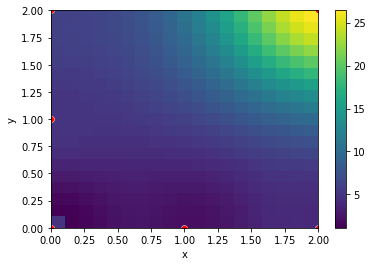

In [12]:
xn = np.linspace(0,2,20)
yn = np.linspace(0,2,20)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')

iwd = IWD(
    known_cp = cp,
    unknown_cp = cp2,
    p = 2
)

wm = iwd.forward('v')

wm.plot_mesh('v')
cp.plot(color='red')

In [13]:
wm.df()

,x,y,z,crs,v
0,0.0,0.000000,None,None,4.904762
1,0.0,0.105263,None,None,1.124016
2,0.0,0.210526,None,None,1.514603
3,0.0,0.315789,None,None,2.140078
4,0.0,0.421053,None,None,2.900200
...,...,...,...,...,...
395,2.0,1.578947,None,None,22.614441
396,2.0,1.684211,None,None,24.470115
397,2.0,1.789474,None,None,25.874443
398,2.0,1.894737,None,None,26.725222


In [14]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df2 = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
dcp2 = CloudPoints().from_df(df2, x='X',y='Y', fields=['Facies','Porosity','Perm'])
dcp2.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,1.0,0.115359,5.736104
1,100.0,800.0,None,None,1.0,0.136425,17.211462
2,100.0,600.0,None,None,1.0,0.135810,43.724752
3,100.0,500.0,None,None,0.0,0.094414,1.609942
4,100.0,100.0,None,None,0.0,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,1.0,0.109411,3.247265
285,190.0,419.0,None,None,0.0,0.099541,1.528003
286,920.0,379.0,None,None,0.0,0.094099,2.514597
287,60.0,149.0,None,None,0.0,0.100167,3.636854


In [24]:
xn = np.linspace(0,1000,50)
yn = np.linspace(0,1000,50)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')
iwd2 = IWD(
    known_cp = dcp2,
    unknown_cp = cp2,
    p = 2
)
wm2 = iwd2.forward('Porosity')

df_un = wm2.df()
df_un

,x,y,z,crs,Porosity
0,0.0,0.000000,None,None,0.106607
1,0.0,20.408163,None,None,0.103739
2,0.0,40.816327,None,None,0.102452
3,0.0,61.224490,None,None,0.103183
4,0.0,81.632653,None,None,0.102330
...,...,...,...,...,...
2495,1000.0,918.367347,None,None,0.108932
2496,1000.0,938.775510,None,None,0.098912
2497,1000.0,959.183673,None,None,0.090253
2498,1000.0,979.591837,None,None,0.084839


/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)
/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:229: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(d)


<AxesSubplot:xlabel='x', ylabel='y'>

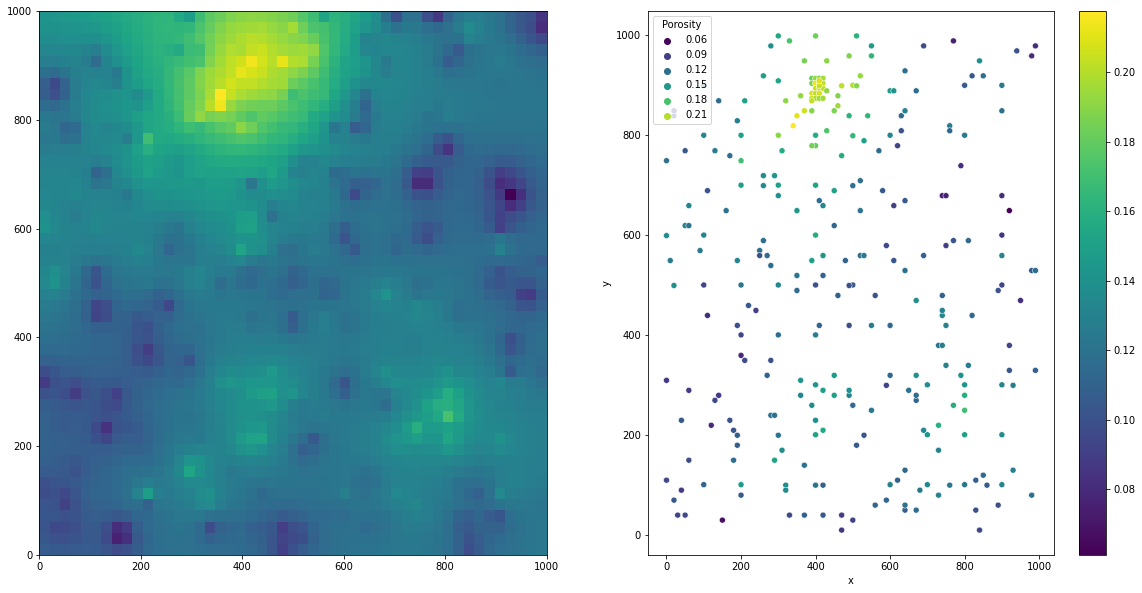

In [25]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wm2.plot_mesh('Porosity',ax=ax[0])
dcp2.plot(ax=ax[1], hue='Porosity', palette='viridis')

In [26]:
data=wm2.df()
data.describe()

,x,y,Porosity
count,2500.000000,2500.000000,2500.000000
mean,500.000000,500.000000,0.128193
std,294.566464,294.566464,0.021081
min,0.000000,0.000000,0.061128
25%,244.897959,244.897959,0.115918
50%,500.000000,500.000000,0.124371
75%,755.102041,755.102041,0.133730
max,1000.000000,1000.000000,0.217630


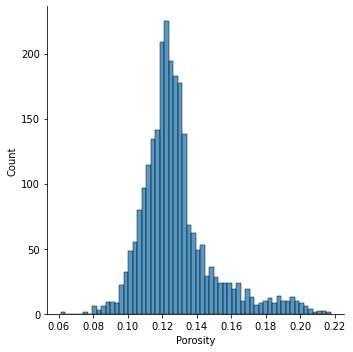

In [27]:
sns.displot(data=data.reset_index(), x='Porosity', kde=False)

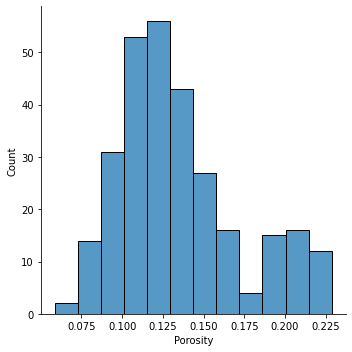

In [28]:
sns.displot(data=dcp2.df().reset_index(), x='Porosity', kde=False)

In [29]:
wm.df().columns

Index(['x', 'y', 'z', 'crs', 'v'], dtype='object')